<a href="https://colab.research.google.com/github/gauthambrijesh/Car-price-prediction/blob/main/car_price_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
cardf = pd.read_csv('/content/Cleaned_Car_data.csv')

In [ ]:
cardf.head()

,Unnamed: 0,name,company,year,Price,kms_driven,fuel_type
0,0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,4,Ford Figo,Ford,2012,175000,41000,Diesel


In [ ]:
cardf.shape

(816, 7)

In [ ]:
cardf.columns

Index(['Unnamed: 0', 'name', 'company', 'year', 'Price', 'kms_driven',
       'fuel_type'],
      dtype='object')

In [ ]:
cardf.drop(labels=['name','Unnamed: 0'], axis=1, inplace = True)

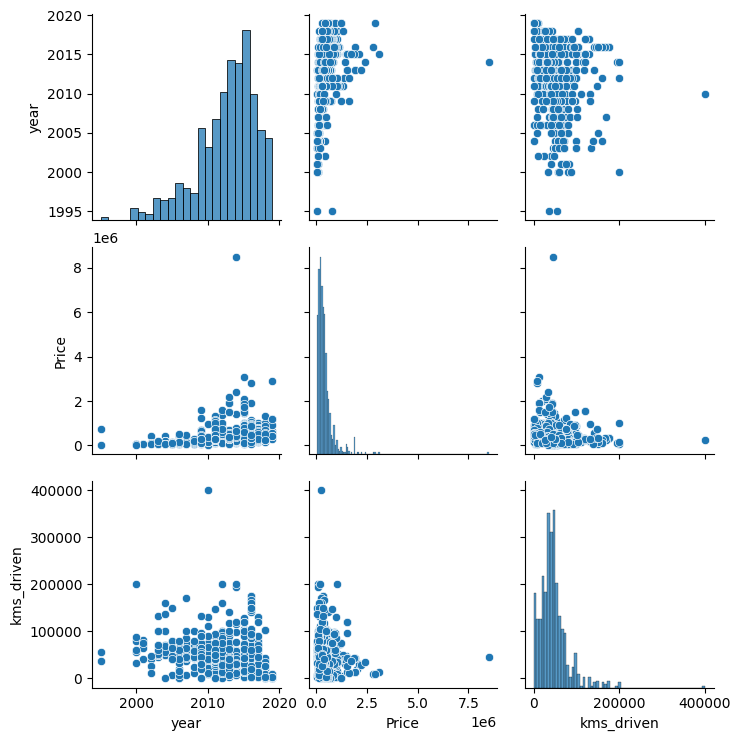

In [ ]:
sns.pairplot(cardf)

<ipython-input-31-88ea7fc407a9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(cardf.corr(), annot=True)


<Axes: >

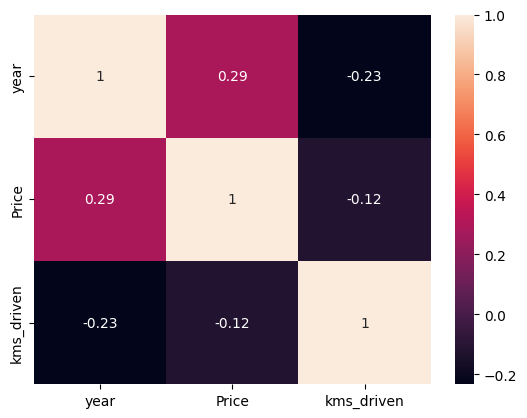

In [ ]:
sns.heatmap(cardf.corr(), annot=True)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
cardf_one = pd.get_dummies(cardf)
cardf_one

,year,Price,kms_driven,company_Audi,company_BMW,company_Chevrolet,company_Datsun,company_Fiat,company_Force,company_Ford,...,company_Nissan,company_Renault,company_Skoda,company_Tata,company_Toyota,company_Volkswagen,company_Volvo,fuel_type_Diesel,fuel_type_LPG,fuel_type_Petrol
0,2007,80000,45000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2006,425000,40,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2014,325000,28000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2014,575000,36000,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,2012,175000,41000,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,2011,270000,50000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
812,2009,110000,30000,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
813,2009,300000,132000,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
814,2018,260000,27000,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [ ]:
X = cardf_one.drop('Price', axis = 1)

y = cardf_one['Price']

In [ ]:
X.head()

,year,kms_driven,company_Audi,company_BMW,company_Chevrolet,company_Datsun,company_Fiat,company_Force,company_Ford,company_Hindustan,...,company_Nissan,company_Renault,company_Skoda,company_Tata,company_Toyota,company_Volkswagen,company_Volvo,fuel_type_Diesel,fuel_type_LPG,fuel_type_Petrol
0,2007,45000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2006,40,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2014,28000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2014,36000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,2012,41000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
y.head()

0     80000
1    425000
2    325000
3    575000
4    175000
Name: Price, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
model = Ridge(alpha=0.6)

In [ ]:
model.fit(X_train, y_train)

Ridge(alpha=0.6)

In [ ]:
X_train_prediction = model.predict(X_train)
print(X_train_prediction)

[ 556448.58596154  345897.16348025  278091.65325767  562745.15162635
  504113.80070237  475310.88896084  405730.1028914   280414.42679271
  251586.43887015  316394.09023062  311353.94704252  372784.49425863
  222645.55898345  361715.62400473  383398.3758954  1564066.28572731
  297723.34263591  401737.18020596  375025.4411546   282393.47007754
  102282.96708363  370785.84040022  837999.62776557  637358.2365742
  394789.5660043   135701.51875874  323871.99548673  204200.25050663
  -54653.75063252  337340.10083696 -107322.78260417 -135346.16461136
  480120.84991901  251961.23444545  435530.76995502 1427178.50818808
  362108.55692048  840000.39422721  395145.62180082  347080.01218866
  402474.9652959  1220276.29579872  297487.15779606  224617.40265637
  394544.96957333  591651.59644009  281651.70548272  394451.2706795
 1760141.55470622  296523.99679499  684692.7981654   470113.18054929
  102009.69695791  529272.28976325  627424.84742484  366166.28304955
  620217.68075151  422002.78153538  

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

#r squared error
score_1 = r2_score(X_train_prediction, y_train)
print(100 - score_1)

score_2 =  mean_absolute_error(X_train_prediction, y_train)
score_2

99.45544625492974


133178.4294909379

In [ ]:
test_data_prediction = model.predict(X_test)

In [ ]:
#r squared error
score_3 = r2_score(test_data_prediction, y_test)
print(100-score_3)

score_4 =  mean_absolute_error(test_data_prediction, y_test)
score_4

105.54375622168958


207168.4511450803

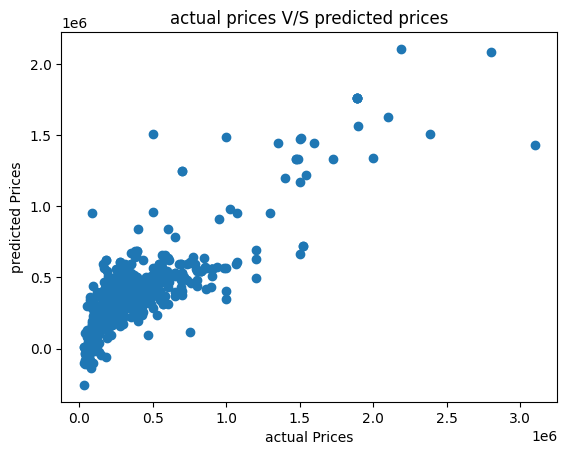

In [ ]:
plt.scatter(y_train, X_train_prediction)
plt.xlabel("actual Prices")
plt.ylabel("predicted Prices")
plt.title("actual prices V/S predicted prices")
plt.show()

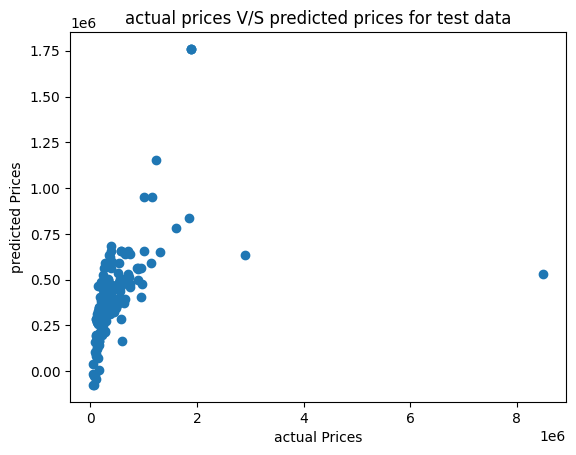

In [ ]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel("actual Prices")
plt.ylabel("predicted Prices")
plt.title("actual prices V/S predicted prices for test data")
plt.show()